#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score, confusion_matrix

#warnings
import warnings
warnings.simplefilter(action='ignore')

## Data Loading

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# checking the simple statistical parameters

df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
X = df.iloc[:,:-1].values #Set our training data

y = df.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# EDA

In [9]:
# checking the number of rows and columns in train dataset
rows,col=X.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 150 
Columns: 4


In [10]:
# Check missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [11]:
#To check number of uniqe elements in each columns.
df.nunique()

,0
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
species,3


In [12]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


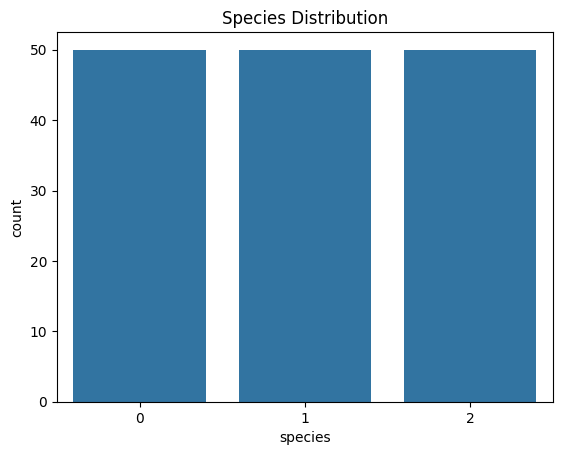

In [13]:
#  distribution
sns.countplot(x='species', data=df)
plt.title('Species Distribution')
plt.show()

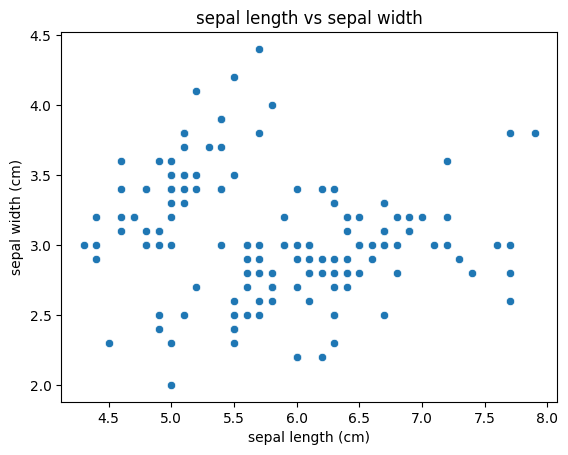

In [14]:
# sepal length vs sepal width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df)
plt.title('sepal length vs sepal width')
plt.show()

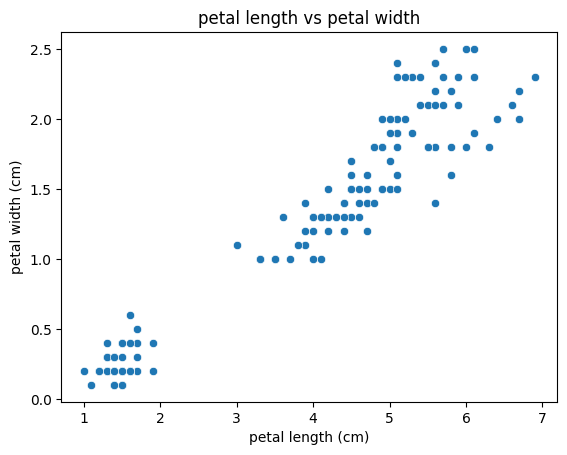

In [15]:
# petal length vs petal width
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df)
plt.title('petal length vs petal width')
plt.show()

In [16]:
fig = px.scatter(data_frame=df, x='sepal length (cm)',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepal length',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [17]:
fig = px.scatter(data_frame=df, x='sepal width (cm)',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepal width',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [18]:
fig = px.scatter(data_frame=df, x='petal length (cm)',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petal length',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [19]:
fig = px.scatter(data_frame=df, x='petal width (cm)',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petal width',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

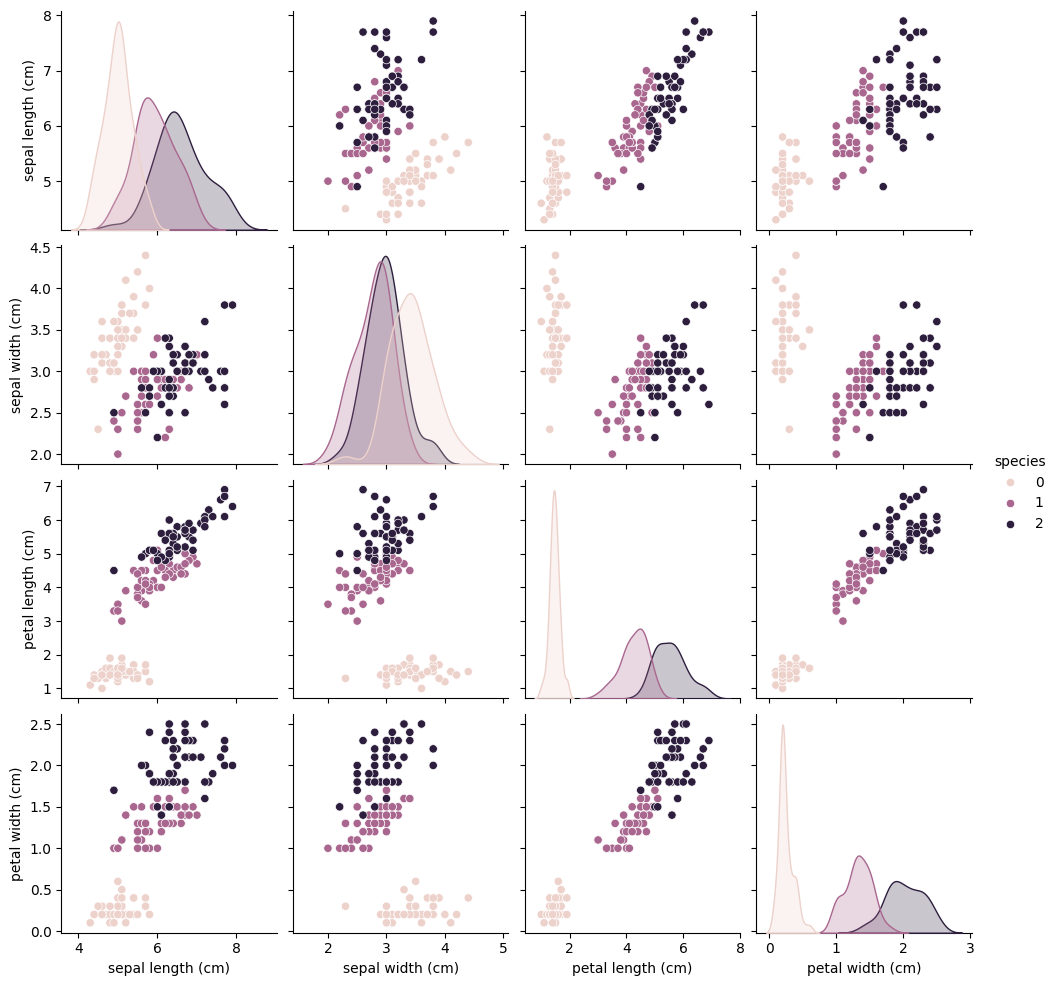

In [20]:
# Pairplot
sns.pairplot(df, hue="species")
plt.show()

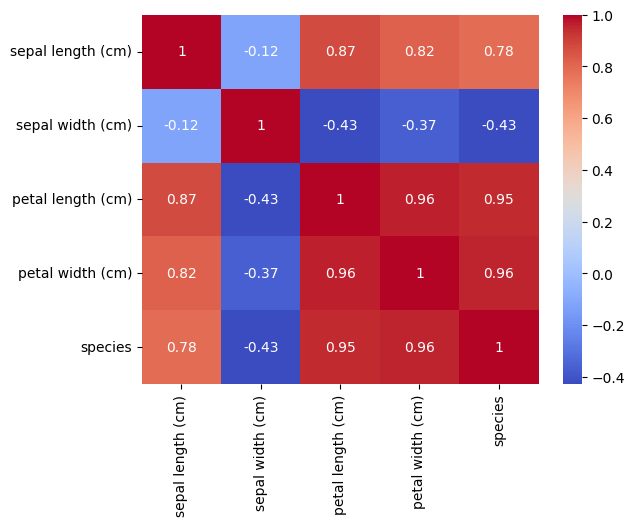

In [21]:
# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature Scaling

In [22]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Clustering Algorithms


##  K-Means Clustering

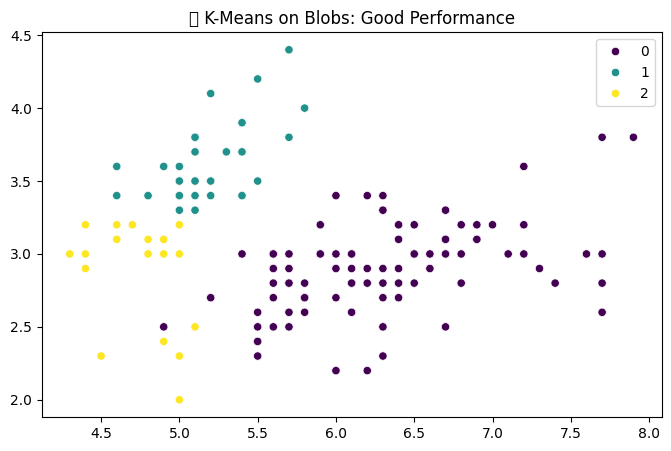

In [23]:
# 🔎 KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis')
plt.title('✅ K-Means on Blobs: Good Performance')
plt.show()

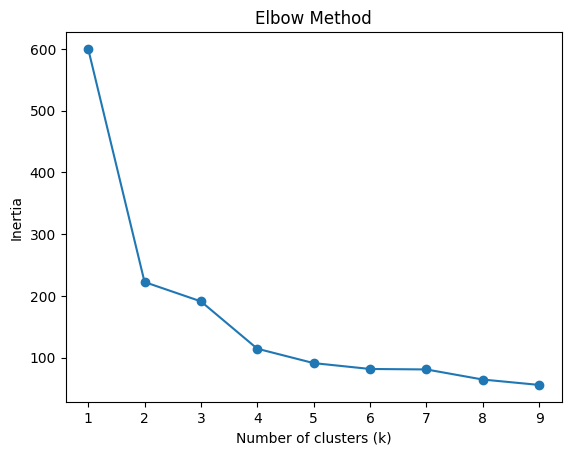

In [24]:
# Elbow method
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

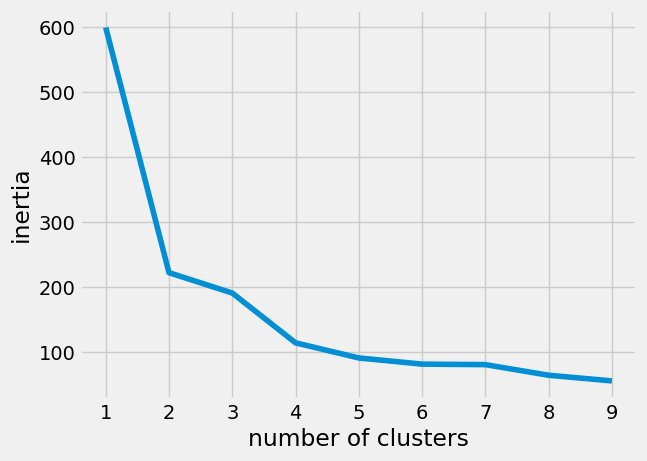

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,10),inertia)
plt.xticks(range(1,10))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [26]:
# Choose optimal k (e.g., 4 from elbow)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


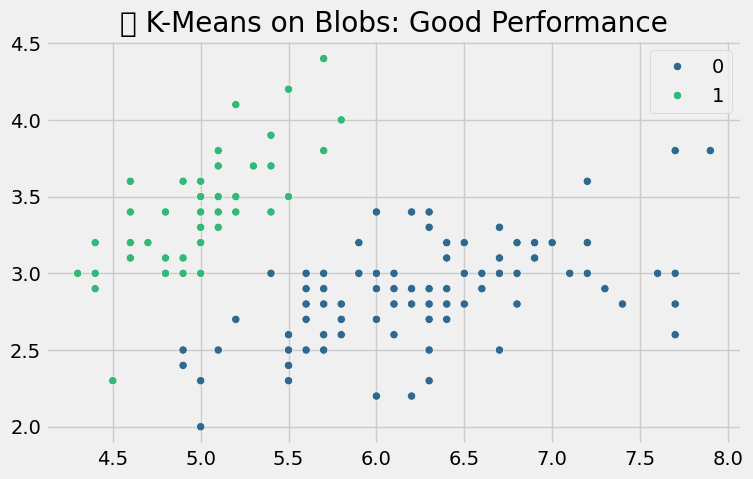

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis')
plt.title('✅ K-Means on Blobs: Good Performance')
plt.show()

## PCA

In [28]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratios:", pca.explained_variance_ratio_)

Explained variance ratios: [0.72962445 0.22850762]


### 📊 Interpretation of Your Output:

* **1st Principal Component (PC1)** explains **\~72.96%** of the total variance.
* **2nd Principal Component (PC2)** explains **\~22.85%** of the total variance.

Combined, the first two components capture:

```python
0.7296 + 0.2285 ≈ 0.9581 → ~95.81%
```

### 📌 Visual Insight:

showing **a nearly complete view** of the original data distribution — with **only 4.2% information loss**.


In [29]:
X_pca[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

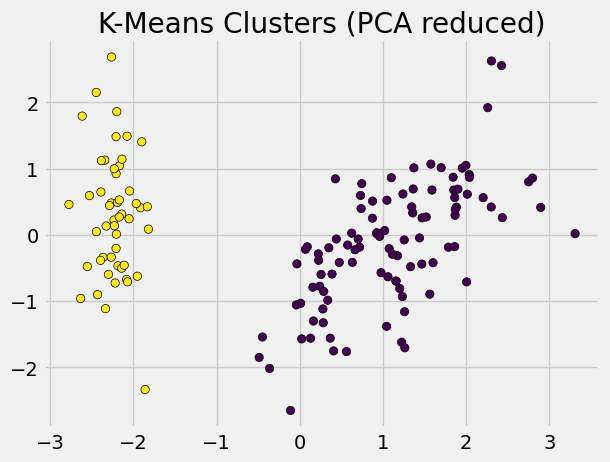

In [30]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap='viridis', edgecolor='k')
plt.title("K-Means Clusters (PCA reduced)")
plt.show()

In [31]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [32]:
# Interpreting principal components
print(pd.DataFrame(pca.components_, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'], index=['PC1','PC2']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942


In [33]:
# PC1 and PC2 are new dimensions that capture the most variation in data.

#  Clustering in PCA space & plot
kmeans_pca = KMeans(n_clusters=3, init='k-means++', n_init=50, random_state=42,max_iter=100)
clusters_pca = kmeans_pca.fit_predict(X_pca)

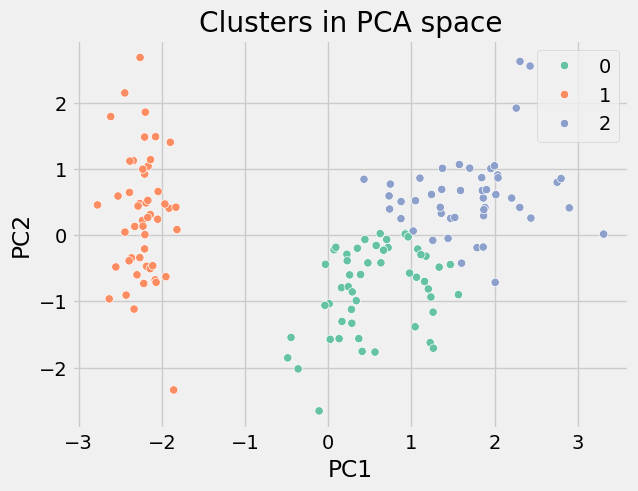

In [34]:
df['Cluster_PCA'] = clusters_pca

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA space')
plt.show()

## Hierarchical Clustering

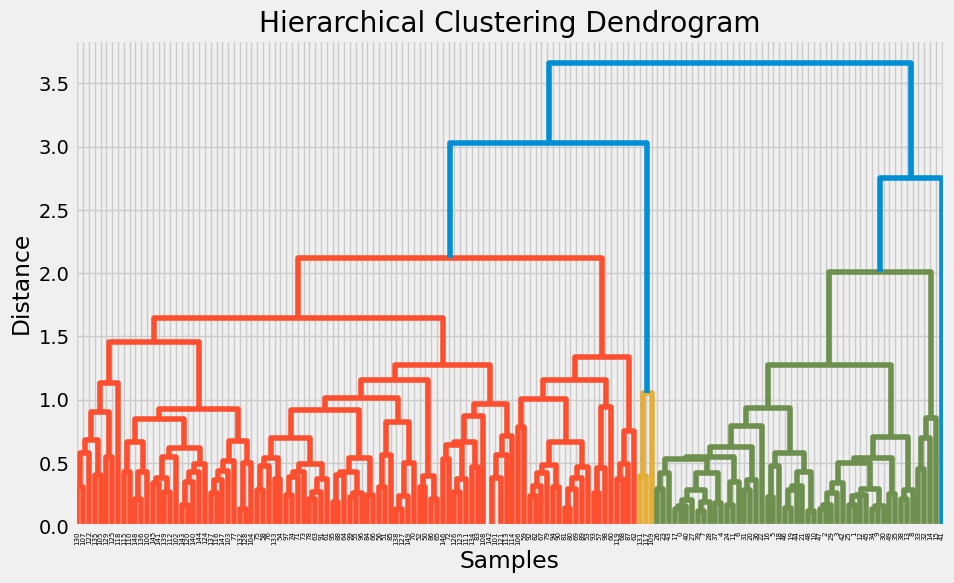

In [35]:
# Dendrogram
linked = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [36]:
# Assign clusters
hc_labels = fcluster(linked, t=4, criterion='maxclust')

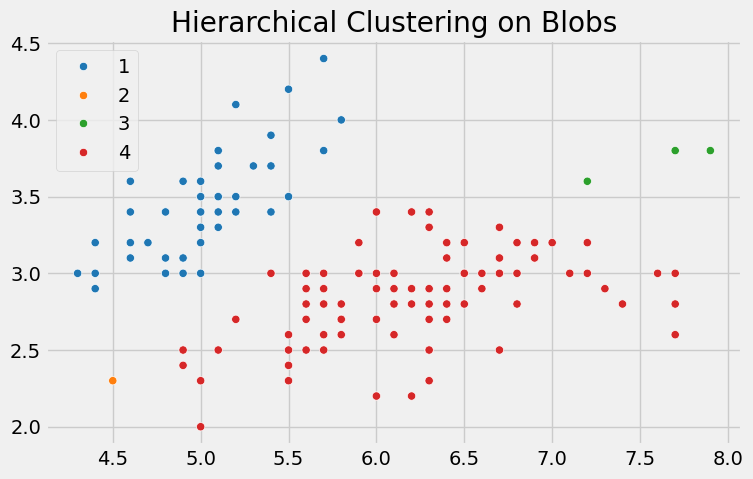

In [37]:
# Visualize clusters without PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hc_labels, palette='tab10')
plt.title('Hierarchical Clustering on Blobs')
plt.show()

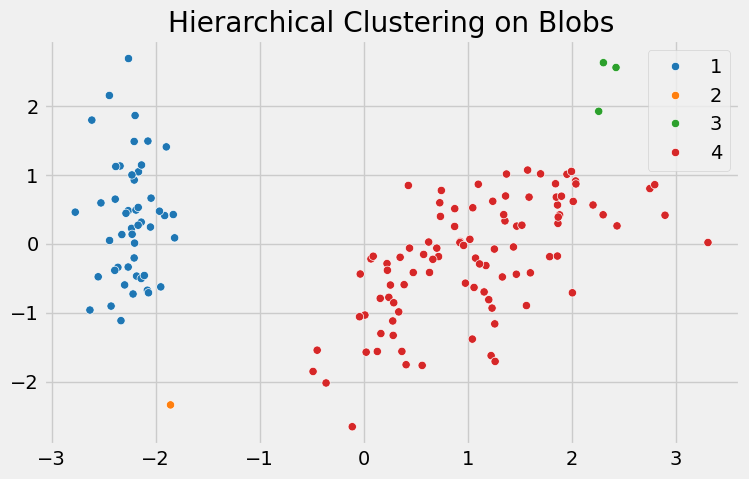

In [38]:
# Visualize clusters with PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hc_labels, palette='tab10')
plt.title('Hierarchical Clustering on Blobs')
plt.show()

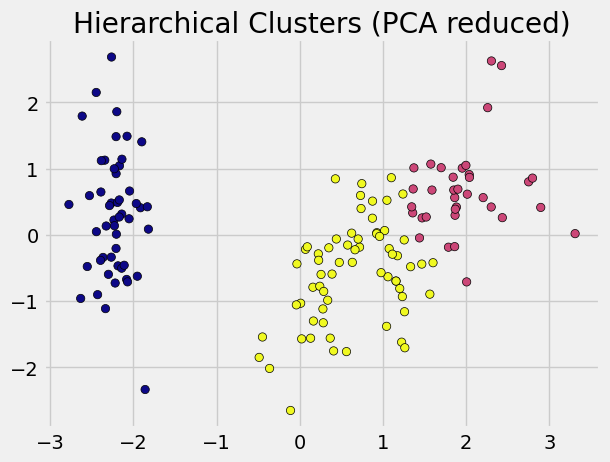

In [39]:
# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan')
y_hc = hc.fit_predict(X_scaled)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='plasma', edgecolor='k')
plt.title("Hierarchical Clusters (PCA reduced)")
plt.show()

## DBSCAN

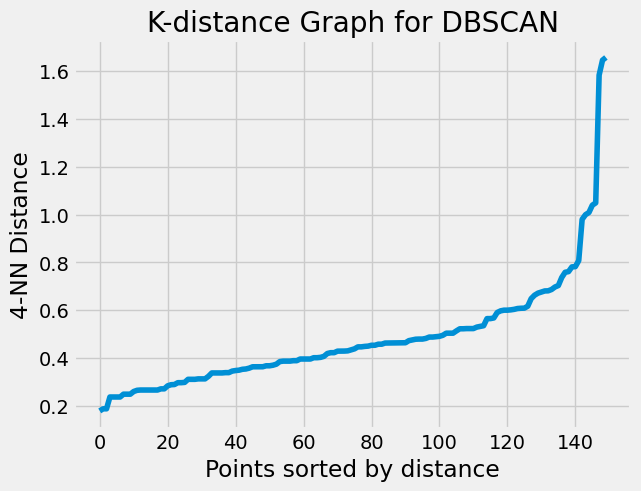

In [40]:
# k-distance graph to find optimal eps
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, 3])

plt.plot(distances)
plt.title("K-distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("4-NN Distance")
plt.show()

In [41]:
# Apply DBSCAN (assume eps from graph ~0.8)
# Fit DBSCAN
db = DBSCAN(eps=0.8, min_samples=5)
db_labels = db.fit_predict(X_scaled)

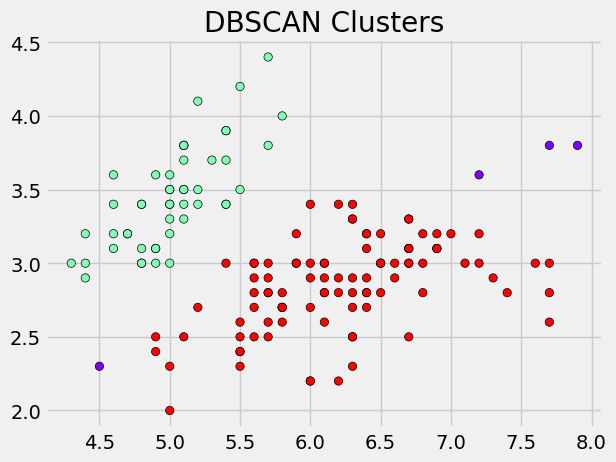

In [42]:
# Visualize
plt.scatter(X[:, 0], X[:, 1], c=db_labels, cmap='rainbow', edgecolor='k')
plt.title("DBSCAN Clusters")
plt.show()

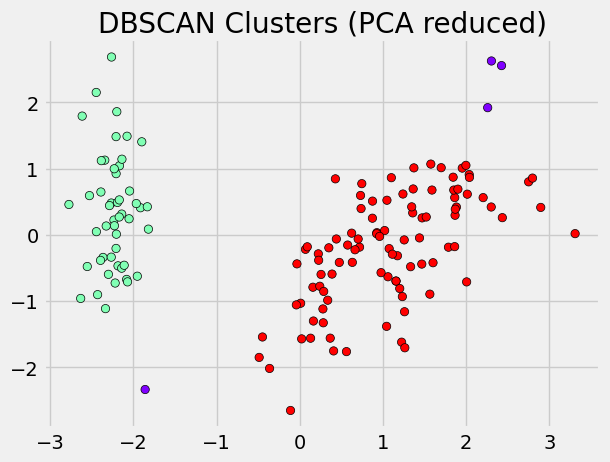

In [43]:
# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='rainbow', edgecolor='k')
plt.title("DBSCAN Clusters (PCA reduced)")
plt.show()

## Evaluation for K-Means

K-Means Adjusted Rand Index: 0.6201351808870379


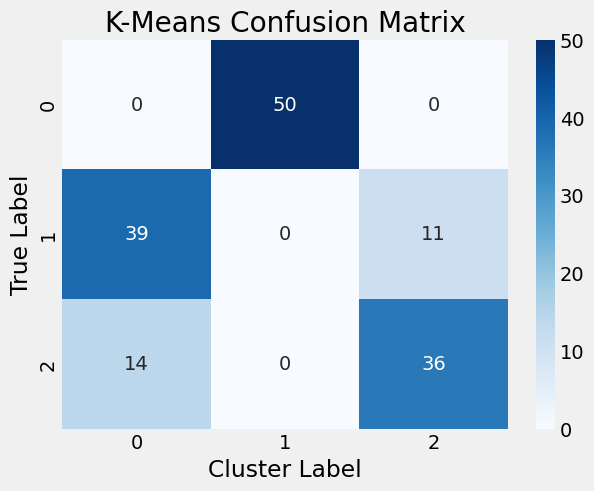

In [44]:
# True labels
true_labels = df['species']

# Predicted labels from K-Means: y_kmeans
print("K-Means Adjusted Rand Index:", adjusted_rand_score(true_labels, clusters_pca))

# Confusion Matrix
cm_kmeans = confusion_matrix(true_labels, clusters_pca)

# Visualize Confusion Matrix
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.title("K-Means Confusion Matrix")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()


## Evaluation for Hierarchical Clustering

Hierarchical Clustering ARI: 0.7183576141196959


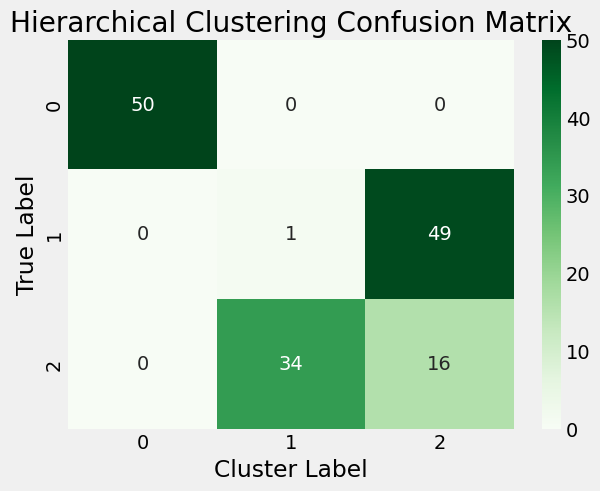

In [45]:
# Predicted labels from Hierarchical Clustering: y_hc
print("Hierarchical Clustering ARI:", adjusted_rand_score(true_labels, y_hc))

# Confusion Matrix
cm_hc = confusion_matrix(true_labels, y_hc)

# Visualize
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Greens')
plt.title("Hierarchical Clustering Confusion Matrix")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()


## Evaluation for DBSCAN

DBSCAN ARI: 0.5517553852833211


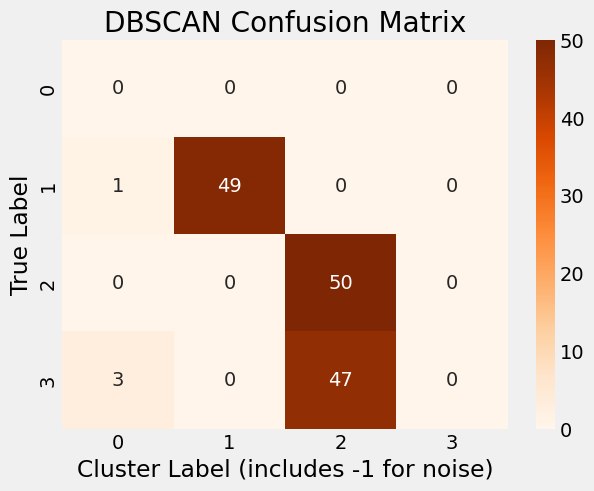

In [46]:
# Predicted labels from DBSCAN: db_labels
# Note: DBSCAN may assign -1 to noise points

print("DBSCAN ARI:", adjusted_rand_score(true_labels, db_labels))

# Confusion Matrix
cm_db = confusion_matrix(true_labels, db_labels)

# Visualize
sns.heatmap(cm_db, annot=True, fmt='d', cmap='Oranges')
plt.title("DBSCAN Confusion Matrix")
plt.xlabel("Cluster Label (includes -1 for noise)")
plt.ylabel("True Label")
plt.show()


In [47]:
results = {
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Adjusted Rand Index": [
        adjusted_rand_score(true_labels, clusters_pca),
        adjusted_rand_score(true_labels, y_hc),
        adjusted_rand_score(true_labels, db_labels),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


      Algorithm  Adjusted Rand Index
0       K-Means             0.620135
1  Hierarchical             0.718358
2        DBSCAN             0.551755


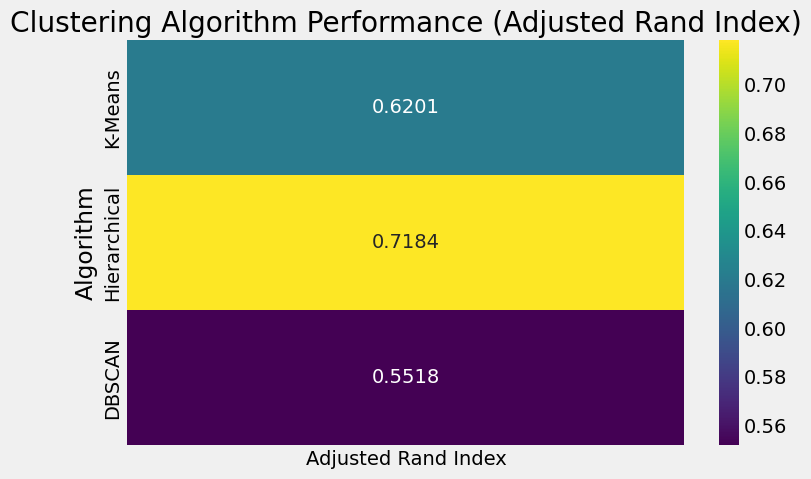

In [48]:
plt.figure(figsize=(8, 5))
sns.heatmap(results_df.set_index('Algorithm'), annot=True, cmap='viridis', fmt=".4f")
plt.title("Clustering Algorithm Performance (Adjusted Rand Index)")
plt.show()